In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [3]:
df_indices = pd.read_excel('DataIndices.xlsx', index_col='Data')
df_indices

,IMA-B 5+,IMA-B,IMA-B 5,IRF-M 1,CDI,110% CDI,IFMM,IBOV,SMLL,IFIX,BDRX
Data,,,,,,,,,,,
2012-12-31,4204.599634,3478.379033,3014.912064,5737.455948,1182.160210,1300.376231,6.953935,60952.00,1544.00,1573.34,1512.00
2013-01-02,4224.573852,3489.934645,3018.645284,5738.991808,1182.474137,1300.721551,6.970499,62550.00,1567.00,1580.50,1558.00
2013-01-03,4258.094680,3509.030745,3024.278307,5740.689605,1182.788148,1301.066963,6.978520,63312.00,1568.00,1579.74,1561.00
2013-01-04,4270.008292,3515.468459,3025.536078,5741.673020,1183.102681,1301.412949,6.980126,62523.00,1552.00,1582.08,1561.00
2013-01-07,4273.086185,3518.061175,3027.842054,5743.568446,1183.416858,1301.758544,6.977696,61932.00,1540.00,1583.05,1554.00
...,...,...,...,...,...,...,...,...,...,...,...
2021-05-25,9634.114489,7973.758102,7047.878538,11709.599518,2350.703001,2585.773301,15.597068,122987.71,3010.81,2799.18,12916.57
2021-05-26,9660.971483,7986.830010,7049.333192,11712.206374,2351.014907,2586.116398,15.614789,123989.17,3046.79,2788.35,12886.22
2021-05-27,9720.396106,8017.374635,7055.773123,11714.253188,2351.326855,2586.459541,15.645760,124366.57,3086.22,2792.67,12752.47


<Axes: xlabel='Data'>

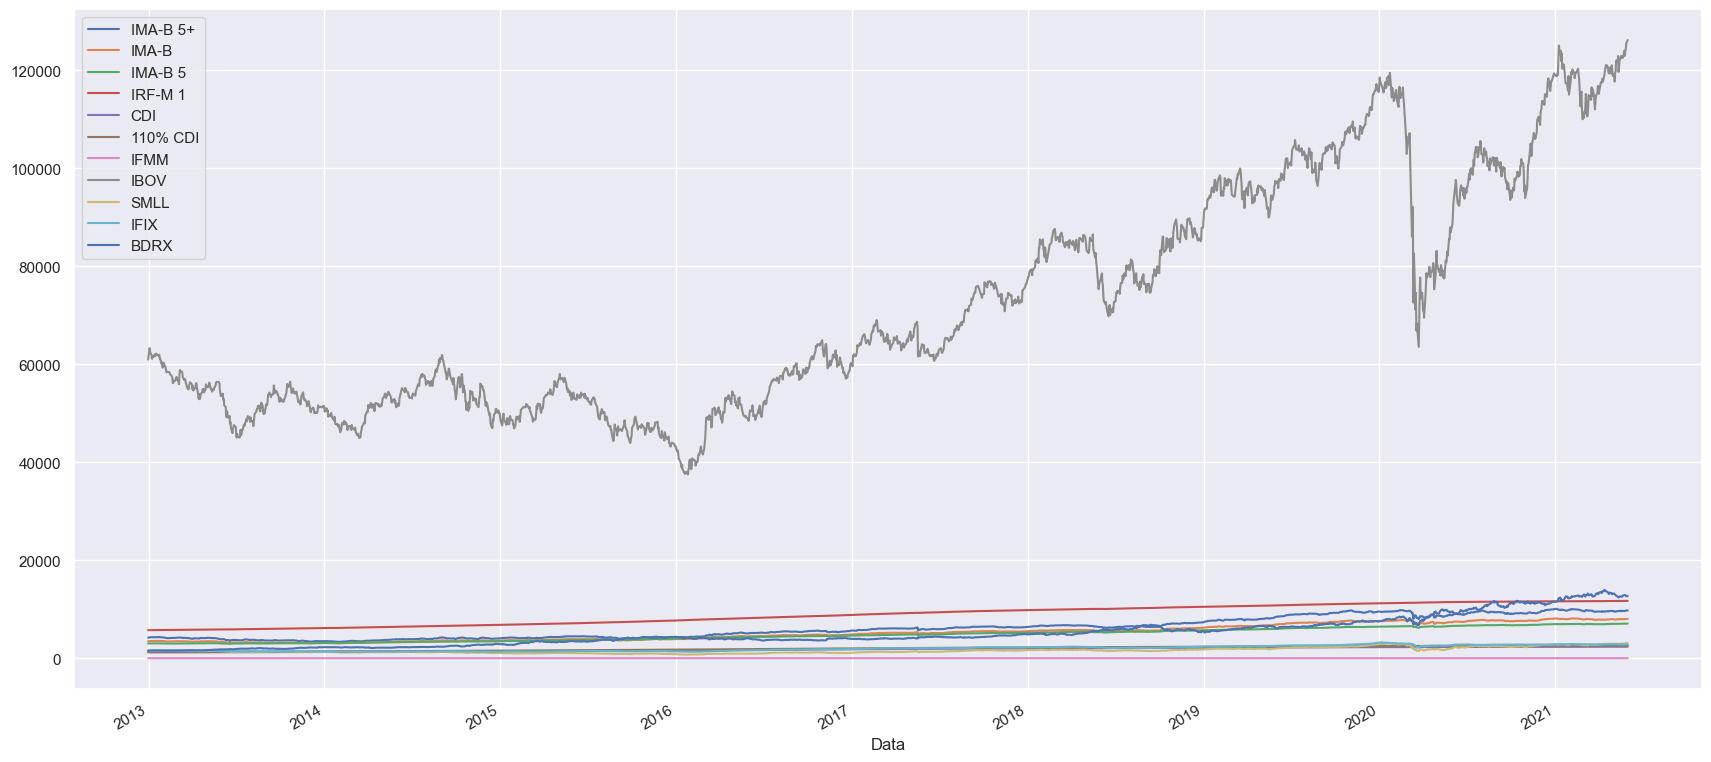

In [4]:
sns.set()
df_indices.plot(figsize=(21,10))

In [5]:
# Transformando o retorno da carteira em retorno Anual - Planilha do Renan
retorno = df_indices.pct_change()
display(retorno)
media = retorno.mean()
display(media)
ipca_lp = 0.0571731718296422
retorno_real = ((1+media)**252)/(1+ipca_lp)-1
retorno_real

,IMA-B 5+,IMA-B,IMA-B 5,IRF-M 1,CDI,110% CDI,IFMM,IBOV,SMLL,IFIX,BDRX
Data,,,,,,,,,,,
2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,0.004751,0.003322,0.001238,0.000268,0.000266,0.000266,0.002382,0.026217,0.014896,0.004551,0.030423
2013-01-03,0.007935,0.005472,0.001866,0.000296,0.000266,0.000266,0.001151,0.012182,0.000638,-0.000481,0.001926
2013-01-04,0.002798,0.001835,0.000416,0.000171,0.000266,0.000266,0.000230,-0.012462,-0.010204,0.001481,0.000000
2013-01-07,0.000721,0.000738,0.000762,0.000330,0.000266,0.000266,-0.000348,-0.009453,-0.007732,0.000613,-0.004484
...,...,...,...,...,...,...,...,...,...,...,...
2021-05-25,0.000196,-0.000510,-0.001390,0.000371,0.000133,0.000133,-0.001346,-0.008416,0.004641,-0.001299,0.000524
2021-05-26,0.002788,0.001639,0.000206,0.000223,0.000133,0.000133,0.001136,0.008143,0.011950,-0.003869,-0.002350
2021-05-27,0.006151,0.003824,0.000914,0.000175,0.000133,0.000133,0.001983,0.003044,0.012941,0.001549,-0.010379


IMA-B 5+    0.000429
IMA-B       0.000411
IMA-B 5     0.000406
IRF-M 1     0.000338
CDI         0.000326
110% CDI    0.000326
IFMM        0.000388
IBOV        0.000478
SMLL        0.000446
IFIX        0.000292
BDRX        0.001075
dtype: float64

IMA-B 5+    0.053780
IMA-B       0.049144
IMA-B 5     0.047785
IRF-M 1     0.030036
CDI         0.026837
110% CDI    0.026837
IFMM        0.042991
IBOV        0.066858
SMLL        0.058487
IFIX        0.018054
BDRX        0.240005
dtype: float64

In [6]:
# Caluclando Covariancia das carteiras
cov = retorno.cov() * 252
cov

,IMA-B 5+,IMA-B,IMA-B 5,IRF-M 1,CDI,110% CDI,IFMM,IBOV,SMLL,IFIX,BDRX
IMA-B 5+,0.015382,0.010529,0.003291,0.000355,0.000005,0.000005,0.002360,0.017202,0.016621,0.004214,-0.004434
IMA-B,0.010529,0.007289,0.002395,0.000263,0.000005,0.000005,0.001645,0.011595,0.011273,0.002927,-0.003214
IMA-B 5,0.003291,0.002395,0.001059,0.000122,0.000004,0.000004,0.000632,0.003693,0.003825,0.001172,-0.000987
IRF-M 1,0.000355,0.000263,0.000122,0.000027,0.000005,0.000005,0.000077,0.000370,0.000383,0.000097,-0.000168
CDI,0.000005,0.000005,0.000004,0.000005,0.000005,0.000005,0.000004,-0.000004,-0.000011,0.000006,-0.000010
110% CDI,0.000005,0.000005,0.000004,0.000005,0.000005,0.000005,0.000004,-0.000004,-0.000011,0.000006,-0.000010
IFMM,0.002360,0.001645,0.000632,0.000077,0.000004,0.000004,0.001222,0.005244,0.005343,0.001352,0.001400
IBOV,0.017202,0.011595,0.003693,0.000370,-0.000004,-0.000004,0.005244,0.066436,0.054803,0.009781,0.004114
SMLL,0.016621,0.011273,0.003825,0.000383,-0.000011,-0.000011,0.005343,0.054803,0.057165,0.011175,0.002209
IFIX,0.004214,0.002927,0.001172,0.000097,0.000006,0.000006,0.001352,0.009781,0.011175,0.007794,0.001097


In [7]:
# Calculando correlação das carteiras
corr = retorno.corr()
corr

,IMA-B 5+,IMA-B,IMA-B 5,IRF-M 1,CDI,110% CDI,IFMM,IBOV,SMLL,IFIX,BDRX
IMA-B 5+,1.000000,0.994334,0.815237,0.549254,0.018621,0.018621,0.544415,0.538111,0.560523,0.384892,-0.194942
IMA-B,0.994334,1.000000,0.862103,0.592205,0.023465,0.023465,0.551392,0.526925,0.552241,0.388351,-0.205313
IMA-B 5,0.815237,0.862103,1.000000,0.717636,0.047760,0.047760,0.555467,0.440233,0.491522,0.408033,-0.165435
IRF-M 1,0.549254,0.592205,0.717636,1.000000,0.429444,0.429444,0.420966,0.275878,0.307358,0.211952,-0.175526
CDI,0.018621,0.023465,0.047760,0.429444,1.000000,1.000000,0.052312,-0.007359,-0.020297,0.027578,-0.024815
110% CDI,0.018621,0.023465,0.047760,0.429444,1.000000,1.000000,0.052312,-0.007359,-0.020297,0.027578,-0.024815
IFMM,0.544415,0.551392,0.555467,0.420966,0.052312,0.052312,1.000000,0.582141,0.639363,0.438295,0.218397
IBOV,0.538111,0.526925,0.440233,0.275878,-0.007359,-0.007359,0.582141,1.000000,0.889275,0.429825,0.087031
SMLL,0.560523,0.552241,0.491522,0.307358,-0.020297,-0.020297,0.639363,0.889275,1.000000,0.529422,0.050382
IFIX,0.384892,0.388351,0.408033,0.211952,0.027578,0.027578,0.438295,0.429825,0.529422,1.000000,0.067747


In [8]:
num_indices = df_indices.shape[1]
num_carteiras = 10000

lst_retorno = []
lst_volatilidade = []
lst_peso = []
lst_sharpe_ratio = []

In [9]:
# Exemplo pegando um peso aleatório baseado na quantidade de ativos
peso = np.random.random(num_indices)
peso /= np.sum(peso)
peso

array([0.07281315, 0.18371897, 0.05675686, 0.12181409, 0.13800559,
       0.04449433, 0.0153351 , 0.15078994, 0.08491788, 0.03302779,
       0.09832629])

In [10]:
# Exemplo de calculo da volatilidade
volatilidade = np.sqrt(np.dot(peso.T, np.dot(cov, peso)))
volatilidade

0.07950743524871036

In [11]:
# Exemplo de cálculo do retorno esperado
retorno_esperado = np.dot(peso, retorno_real)
retorno_esperado

0.06411566743740481

In [12]:
# Exemplo de cálculo do Sharpe
sharpe_ratio = retorno_esperado / volatilidade
sharpe_ratio

0.8064109631613955

In [13]:
for carteira in range(num_carteiras):
    # Calculando o peso
    peso = np.random.random(num_indices)
    peso /= np.sum(peso)
    lst_peso.append(peso)
    
    # Calculando a volatilidade
    volatilidade = np.sqrt(np.dot(peso.T, np.dot(cov, peso)))
    lst_volatilidade.append(volatilidade)
    
    #Calculando o retorno
    retorno_esperado = np.dot(peso, retorno_real)
    lst_retorno.append(retorno_esperado)
    
    # Calculando Sharpe Ratio
    sharpe_ratio = retorno_esperado / volatilidade
    lst_sharpe_ratio.append(sharpe_ratio)

In [14]:
dict_carteiras = {'Retorno': lst_retorno, 
                  'Volatilidade': lst_volatilidade, 
                  'sharpe_ratio': lst_sharpe_ratio}

portfolios = pd.DataFrame(dict_carteiras)
portfolios

,Retorno,Volatilidade,sharpe_ratio
0,0.040478,0.045489,0.889839
1,0.071230,0.061951,1.149791
2,0.038438,0.052749,0.728697
3,0.055120,0.097436,0.565712
4,0.071331,0.103651,0.688189
...,...,...,...
9995,0.072899,0.073907,0.986352
9996,0.045120,0.055129,0.818439
9997,0.068474,0.085528,0.800612
9998,0.053390,0.049858,1.070848


C:\Users\Carlos\AppData\Local\Temp\ipykernel_10832\3181161429.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')
c:\Users\Carlos\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Volatilidade', ylabel='Retorno'>

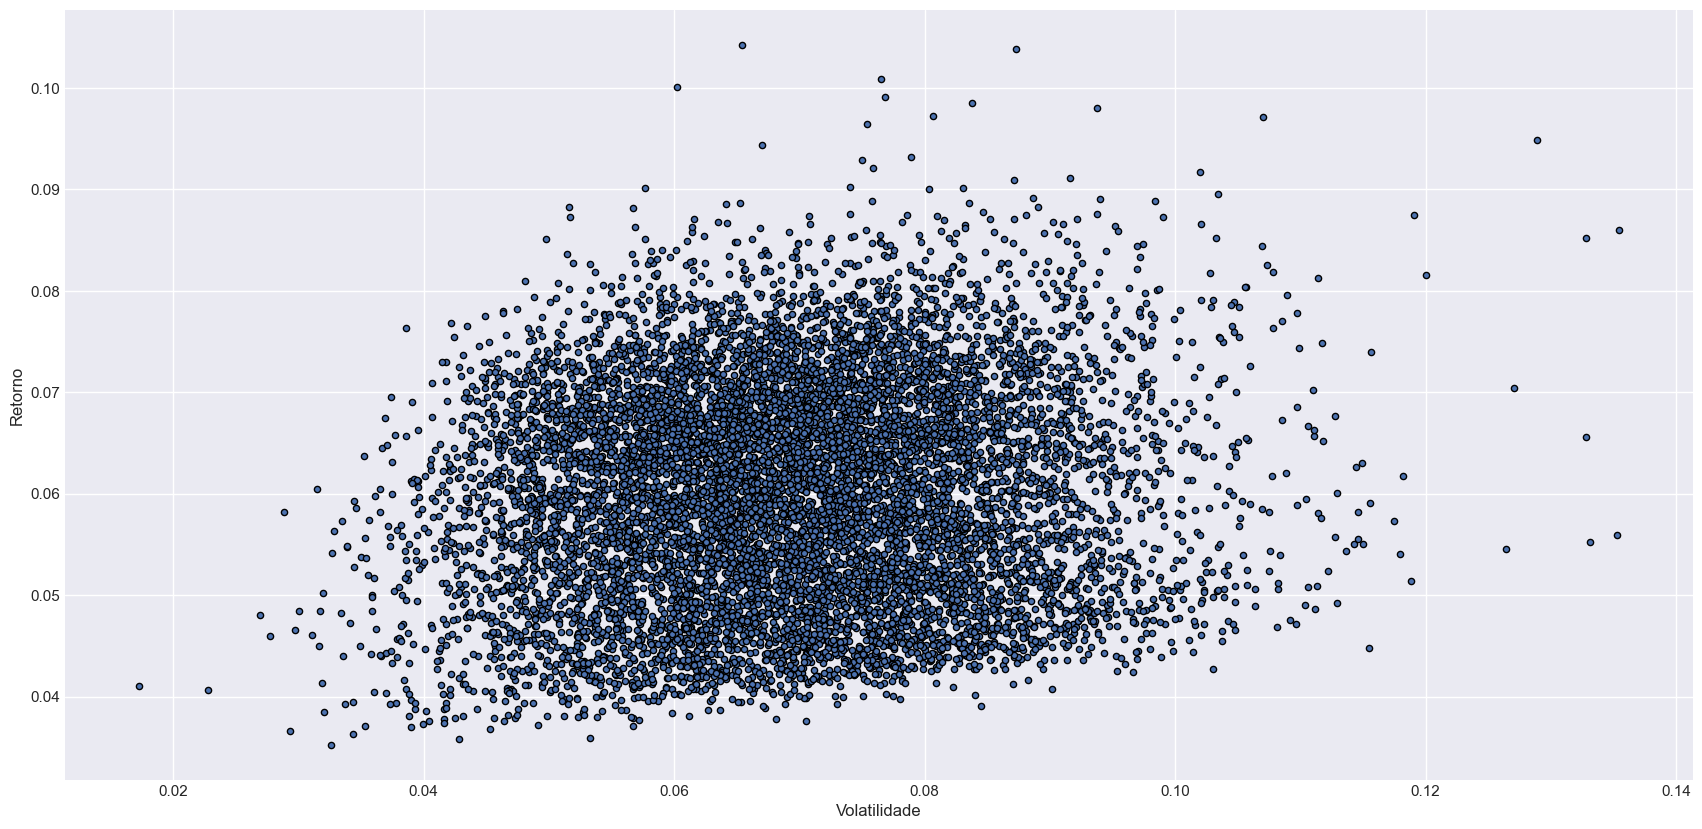

In [15]:
plt.style.use('seaborn-dark')
portfolios.plot.scatter(x='Volatilidade',
                       y='Retorno',
                       cmap='RdYlGn',
                       edgecolors='black',
                       figsize=(21, 10),
                       grid=True)

In [16]:
menor_volatilidade = portfolios['Volatilidade'].min()
carteira_menor_volatilidade = portfolios.loc[portfolios['Volatilidade'] == menor_volatilidade]
carteira_menor_volatilidade

,Retorno,Volatilidade,sharpe_ratio
7071,0.041064,0.017296,2.374249


In [17]:
maior_sharpe = portfolios['sharpe_ratio'].max()
carteira_maior_sharpe = portfolios.loc[portfolios['sharpe_ratio'] == maior_sharpe]
carteira_maior_sharpe

,Retorno,Volatilidade,sharpe_ratio
7071,0.041064,0.017296,2.374249


In [18]:
maior_retorno = portfolios['Retorno'].max()
carteira_maior_retorno = portfolios.loc[portfolios['Retorno'] == maior_retorno]
carteira_maior_retorno

,Retorno,Volatilidade,sharpe_ratio
2618,0.10424,0.065403,1.593804
